In [ ]:
# Import necessary packages and if missing, install them
import os 
from PIL import Image
import string
from pickle import dump
from pickle import load
import pip

package_names = ["numpy", "keras", "pillow", "tqdm", "jupyterlab", "keras_preprocessing", "ipywidgets", "pydot", "graphviz"]

#Install packages if not available
for package in package_names:
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])

#Import necessary packages
import numpy as np
from keras.applications.xception import Xception
from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Add
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import LSTM, Embedding, Dropout
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: pillow in /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages (10.0.1)

/var/folders/s4/_s7bt8m12cs4j6d1lwvcj7_c0000gn/T/ipykernel_55339/3980262822.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

In [2]:
# Load the document
def load_doc(filename):
    # Open file to read
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# get all images with their captions
def image_captions(filename):
    file = load_doc(filename)
    captions = file.split('\n')
    descriptions = {}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
           descriptions[img[:-2]] = [ caption ]
        else:
           descriptions[img[:-2]].append(caption)
    return descriptions

#Data cleaning function will convert all upper case alphabets to lowercase, removing punctuations and words containing numbers
def txt_clean(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):
           img_caption.replace("-"," ")
           descp = img_caption.split()
          #uppercase to lowercase
           descp = [wrd.lower() for wrd in descp]
          #remove punctuation from each token
           descp = [wrd.translate(table) for wrd in descp]
          #remove hanging 's and a
           descp = [wrd for wrd in descp if(len(wrd)>1)]
          #remove words containing numbers with them
           descp = [wrd for wrd in descp if(wrd.isalpha())]
          #converting back to string
           img_caption = ' '.join(descp)
           captions[img][i]= img_caption
    return captions

def txt_vocab(descriptions):
    # To build vocab of all unique words
    vocab = set()
    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]
        
    return vocab

#To save all descriptions in one file
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
           lines.append(key + '\t' + desc )
    data = "\n".join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()
    
# Set these path according to project folder in you system, like i create a folder with my name shikha inside D-drive
dataset_text = "Flickr8k_text"
dataset_images = "Flicker8k_Dataset"
#to prepare our text data
filename = dataset_text + "/" + "Flickr8k.token.txt"
#loading the file that contains all data
#map them into descriptions dictionary 
descriptions = image_captions(filename)
print("Length of descriptions =" ,len(descriptions))
#cleaning the descriptions
clean_descriptions = txt_clean(descriptions)
#to build vocabulary
vocabulary = txt_vocab(clean_descriptions)
print("Length of vocabulary = ", len(vocabulary))
#saving all descriptions in one file
save_descriptions(clean_descriptions, "descriptions.txt")

Length of descriptions = 8092
Length of vocabulary =  8763


In [3]:
def extract_features(directory):
    model = Xception(include_top=False, pooling='avg')
    features = {}
    for pic in tqdm(os.listdir(directory)):
        file = directory + "/" + pic
        image = Image.open(file)
        image = image.resize((299,299))
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        features[pic] = feature
    return features

#2048 feature vector
features = extract_features(dataset_images)
dump(features, open("features.p","wb"))
#to directly load the features from the pickle file.
features = load(open("features.p","rb"))

/var/folders/s4/_s7bt8m12cs4j6d1lwvcj7_c0000gn/T/ipykernel_55339/1468867735.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pic in tqdm(os.listdir(directory)):


  0%|          | 0/8091 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms

In [9]:
#load the data
def load_photos(filename):
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    return photos

def load_clean_descriptions(filename, photos):
    #loading clean_descriptions
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):
        words = line.split()
        if len(words) < 1 :
           continue
        image, image_caption = words[0], words[1:]
        if image in photos:
            if image not in descriptions:
               descriptions[image] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[image].append(desc)
    return descriptions

def load_features(photos):
    #loading all features
    all_features = load(open("features.p","rb"))
    #selecting only needed features
    features = {k:all_features[k] for k in photos}
    return features

filename = dataset_text + "/" + "Flickr_8k.trainImages.txt"
train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("descriptions.txt", train_imgs)
train_features = load_features(train_imgs)

In [10]:
#convert dictionary to clear list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
       [all_desc.append(d) for d in descriptions[key]]
    return all_desc

#creating tokenizer class
#this will vectorise text corpus
#each integer will represent token in dictionary
def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

# give each word an index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size #The size of our vocabulary is 7577 words.

7577

In [11]:
#calculate maximum length of descriptions to decide the model structure parameters.
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)

max_length = max_length(descriptions)
max_length #Max_length of description is 32

32

In [87]:
def data_generator(descriptions, features, tokenizer, max_length):
      while 1:
            for key, description_list in descriptions.items():
                  #retrieve photo features
                  feature = features[key][0]
                  inp_image, inp_seq, op_word = create_sequences(tokenizer, max_length, description_list, feature)
                  yield (inp_image, inp_seq), op_word

def create_sequences(tokenizer, max_length, desc_list, feature):
      x_1, x_2, y = list(), list(), list()
      # move through each description for the image
      for desc in desc_list:
            # encode the sequence
            seq = tokenizer.texts_to_sequences([desc])[0]
            # divide one sequence into various X,y pairs
            for i in range(1, len(seq)):
                  # divide into input and output pair
                  in_seq, out_seq = seq[:i], seq[i]
                  # pad input sequence
                  in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                  # encode output sequence
                  out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                  # store
                  x_1.append(feature)
                  x_2.append(in_seq)
                  y.append(out_seq)
      return np.array(x_1), np.array(x_2), np.array(y)

#To check the shape of the input and output for your model
[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape

((47, 2048), (47, 32), (47, 7577))

In [67]:
from keras.utils import plot_model
from keras.layers import add

# define the captioning model
def define_model(vocab_size, max_length):
    # features from the CNN model compressed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # merge it [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

In [88]:
# train our model
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)

model = define_model(vocab_size, max_length)
epochs = 10
steps = len(train_descriptions)

# creating a directory named models to save our models
try:
    os.mkdir("models")
except FileExistsError:
    pass

for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit(generator, epochs = 1, steps_per_epoch = steps, verbose = 1)
    model.save("models/model_" + str(i) + ".keras", overwrite=True)

Dataset:  6000
Descriptions: train= 6000
Photos: train= 6000
Vocabulary Size: 7577
Description Length:  32


Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_78      │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_77      │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_25        │ (None, 32, 256)   │  1,939,712 │ input_layer_78[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 2048)      │          0 │ input_layer_77[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_49          │ (None, 32, 256)   │          0 │ embedding_25[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_51        │ (None, 32)        │          0 │ input_layer_78[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_73 (Dense)    │ (None, 256)       │    524,544 │ dropout_48[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_25 (LSTM)      │ (None, 256)       │    525,312 │ dropout_49[0][0], │
│                     │                   │            │ not_equal_51[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_349 (Add)       │ (None, 256)       │          0 │ dense_73[0][0],   │
│                     │                   │            │ lstm_25[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 256)       │     65,792 │ add_349[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_75 (Dense)    │ (None, 7577)      │  1,947,289 │ dense_74[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,002,649 (19.08 MB)

 Trainable params: 5,002,649 (19.08 MB)

 Non-trainable params: 0 (0.00 B)

None
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 368s 61ms/step - loss: 4.9500
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 375s 63ms/step - loss: 3.6923
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 392s 65ms/step - loss: 3.3636
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 379s 63ms/step - loss: 3.1764
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 383s 64ms/step - loss: 3.0497
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 387s 65ms/step - loss: 2.9601
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 373s 62ms/step - loss: 2.8891
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 371s 62ms/step - loss: 2.8331
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 381s 63ms/step - loss: 2.7870
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 386s 64ms/step - loss: 2.7456


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step



start two dogs are playing in the snow end


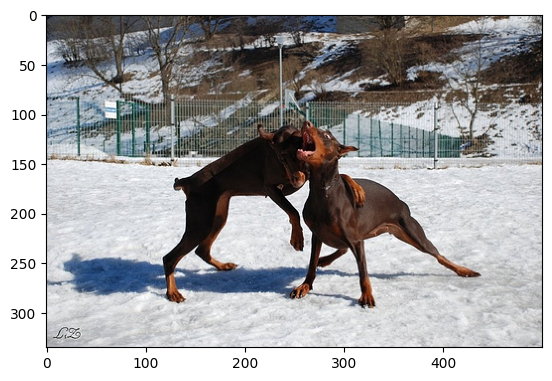

In [100]:
%run -i 'test_image_caption_generator.py' -i 'Flicker8k_Dataset/3385593926_d3e9c21170.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step



start white dog is running through the water end


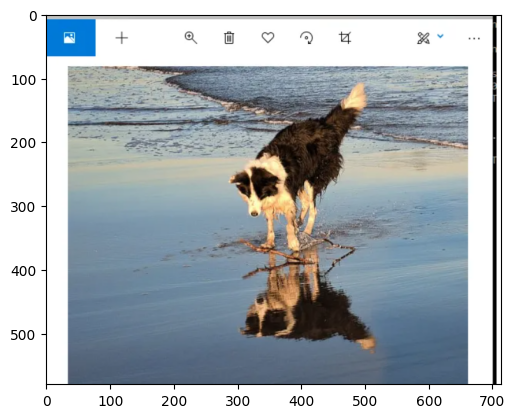

In [101]:
%run -i 'test_image_caption_generator.py' -i 'img2.png'